## Importing Tools

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pyfume.Clustering import Clusterer
from pyfume.EstimateAntecendentSet import AntecedentEstimator
from pyfume.EstimateConsequentParameters import ConsequentEstimator
from pyfume.SimpfulModelBuilder import SugenoFISBuilder
from pyfume.Tester import SugenoFISTester
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score
from numpy import clip, column_stack, argmax
import matplotlib.pyplot as plt

## Pre-processing Data

In [15]:
data = pd.read_csv('./data/wbco.csv',header=None)
indexes = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y']
data.columns = indexes
indexes = indexes[:-1]
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [16]:
dataAux = data.apply(pd.to_numeric, errors='coerce')
data = dataAux.dropna()

In [17]:
dataX = data.drop('Y', axis = 1)
dataY = data.Y

xTrain, xTest, yTrain, yTest = train_test_split(dataX, dataY, test_size = 0.3, random_state=0)

xTrain = xTrain.to_numpy()
xTest = xTest.to_numpy()
yTrain = yTrain.array
yTest = yTest.array

## Building the model

#### FCM

In [18]:
f1Array1 = []

for clustNum in range(2, 10):
    clusters = Clusterer(x_train=xTrain, y_train=yTrain, nr_clus=clustNum)
        
    clustCenters, partMatrix, _ = clusters.cluster(method='fcm')
        
    antEst = AntecedentEstimator(xTrain, partMatrix)
    antParams = antEst.determineMF()
        
    conseqEst = ConsequentEstimator(xTrain, yTrain, partMatrix)
    conseqParams = conseqEst.suglms()
        
    # Build first-order Takagi-Sugeno model
    modbuilder = SugenoFISBuilder(antParams, conseqParams, indexes, save_simpful_code=False)
    model = modbuilder.get_model()
        
    # Get model predictions
    modtester = SugenoFISTester(model, xTest, indexes)
    yPredProbs = clip(modtester.predict()[0], 0, 1)
    yPredProbs = column_stack((1 - yPredProbs, yPredProbs))
    yPrediction = argmax(yPredProbs,axis=1)

    f1 = f1_score(yTest, yPrediction)
    f1Array1.append(f1)

 * Detected 2 rules / clusters
 * Detected Sugeno model type
 * Detected 3 rules / clusters
 * Detected Sugeno model type
 * Detected 4 rules / clusters
 * Detected Sugeno model type
 * Detected 5 rules / clusters
 * Detected Sugeno model type
 * Detected 6 rules / clusters
 * Detected Sugeno model type
 * Detected 7 rules / clusters
 * Detected Sugeno model type
 * Detected 8 rules / clusters
 * Detected Sugeno model type
 * Detected 9 rules / clusters
 * Detected Sugeno model type


#### GK

In [19]:
f1Array2 = []

for clustNum in range(2, 10):
    clusters = Clusterer(x_train=xTrain, y_train=yTrain, nr_clus=clustNum)
        
    clustCenters, partMatrix, _ = clusters.cluster(method='gk')
        
    antEst = AntecedentEstimator(xTrain, partMatrix)
    antParams = antEst.determineMF()
        
    conseqEst = ConsequentEstimator(xTrain, yTrain, partMatrix)
    conseqParams = conseqEst.suglms()
        
    # Build first-order Takagi-Sugeno model
    modbuilder = SugenoFISBuilder(antParams, conseqParams, indexes, save_simpful_code=False)
    model = modbuilder.get_model()
        
    # Get model predictions
    modtester = SugenoFISTester(model, xTest, indexes)
    yPredProbs = clip(modtester.predict()[0], 0, 1)
    yPredProbs = column_stack((1 - yPredProbs, yPredProbs))
    yPrediction = argmax(yPredProbs,axis=1)

    f1 = f1_score(yTest, yPrediction)
    f1Array2.append(f1)


 * Detected 2 rules / clusters
 * Detected Sugeno model type
 * Detected 3 rules / clusters
 * Detected Sugeno model type
 * Detected 4 rules / clusters
 * Detected Sugeno model type
 * Detected 5 rules / clusters
 * Detected Sugeno model type
 * Detected 6 rules / clusters
 * Detected Sugeno model type
 * Detected 7 rules / clusters
 * Detected Sugeno model type
 * Detected 8 rules / clusters
 * Detected Sugeno model type
 * Detected 9 rules / clusters
 * Detected Sugeno model type


#### Local Fit

In [20]:
f1Array3 = []
for clustNum in range(2, 5):
    clusters = Clusterer(x_train=xTrain, y_train=yTrain, nr_clus=clustNum)
        
    clustCenters, partMatrix, _ = clusters.cluster(method='fcm')
        
    antEst = AntecedentEstimator(xTrain, partMatrix)
    antParams = antEst.determineMF()
        
    conseqEst = ConsequentEstimator(xTrain, yTrain, partMatrix)
    conseqParams = conseqEst.suglms(global_fit=False)
        
    # Build first-order Takagi-Sugeno model
    modbuilder = SugenoFISBuilder(antParams, conseqParams, indexes, save_simpful_code=False)
    model = modbuilder.get_model()
        
    # Get model predictions
    modtester = SugenoFISTester(model, xTest, indexes)
    yPredProbs = clip(modtester.predict()[0], 0, 1)
    yPredProbs = column_stack((1 - yPredProbs, yPredProbs))
    yPrediction = argmax(yPredProbs,axis=1)

    f1 = f1_score(yTest, yPrediction)
    f1Array3.append(f1)

 * Detected 2 rules / clusters
 * Detected Sugeno model type
 * Detected 3 rules / clusters
 * Detected Sugeno model type
 * Detected 4 rules / clusters
 * Detected Sugeno model type


In [21]:
f1Array4 = []
for clustNum in range(2, 5):
    clusters = Clusterer(x_train=xTrain, y_train=yTrain, nr_clus=clustNum)
        
    clustCenters, partMatrix, _ = clusters.cluster(method='fcm')
        
    antEst = AntecedentEstimator(xTrain, partMatrix)
    antParams = antEst.determineMF()
        
    conseqEst = ConsequentEstimator(xTrain, yTrain, partMatrix)
    conseqParams = conseqEst.suglms(global_fit=True)
        
    # Build first-order Takagi-Sugeno model
    modbuilder = SugenoFISBuilder(antParams, conseqParams, indexes, save_simpful_code=False)
    model = modbuilder.get_model()
        
    # Get model predictions
    modtester = SugenoFISTester(model, xTest, indexes)
    yPredProbs = clip(modtester.predict()[0], 0, 1)
    yPredProbs = column_stack((1 - yPredProbs, yPredProbs))
    yPrediction = argmax(yPredProbs,axis=1)

    f1 = f1_score(yTest, yPrediction)
    f1Array4.append(f1)

 * Detected 2 rules / clusters
 * Detected Sugeno model type
 * Detected 3 rules / clusters
 * Detected Sugeno model type
 * Detected 4 rules / clusters
 * Detected Sugeno model type


## Plot results

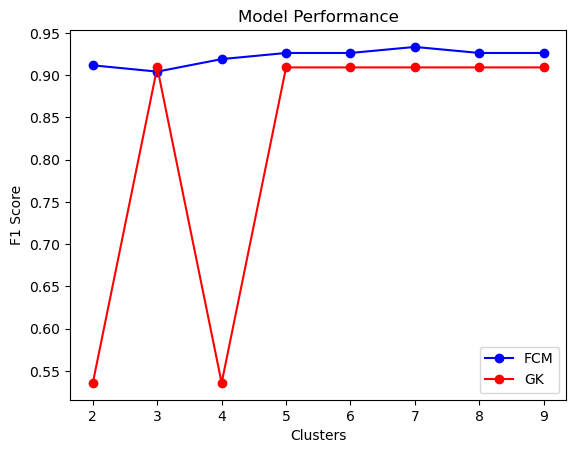

In [24]:
plt.plot(range(2,10), f1Array1, label="FCM", color="blue", marker="o")
plt.plot(range(2,10), f1Array2, label="GK", color="red", marker="o",)
plt.xlabel("Clusters")
plt.ylabel("F1 Score")
plt.title("Model Performance")
plt.legend()
plt.show()

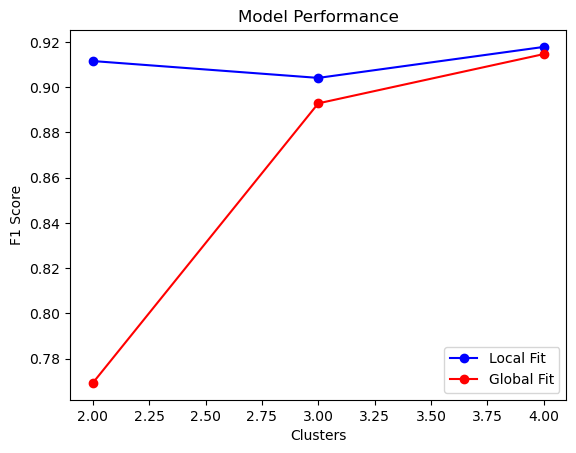

In [25]:
plt.plot(range(2,5), f1Array3, label="Local Fit", color="blue", marker="o")
plt.plot(range(2,5), f1Array4, label="Global Fit", color="red", marker="o",)
plt.xlabel("Clusters")
plt.ylabel("F1 Score")
plt.title("Model Performance")
plt.legend()
plt.show()

## Best model

In [30]:
clusters = Clusterer(x_train=xTrain, y_train=yTrain, nr_clus=4)
        
clustCenters, partMatrix, _ = clusters.cluster(method='fcm')
    
antEst = AntecedentEstimator(xTrain, partMatrix)
antParams = antEst.determineMF()
    
conseqEst = ConsequentEstimator(xTrain, yTrain, partMatrix)
conseqParams = conseqEst.suglms(global_fit=False)
    
# Build first-order Takagi-Sugeno model
modbuilder = SugenoFISBuilder(antParams, conseqParams, indexes, save_simpful_code=False)
model = modbuilder.get_model()
    
# Get model predictions
modtester = SugenoFISTester(model, xTest, indexes)
yPredProbs = clip(modtester.predict()[0], 0, 1)
yPredProbs = column_stack((1 - yPredProbs, yPredProbs))
yPrediction = argmax(yPredProbs,axis=1)

f1 = f1_score(yTest, yPrediction)
print(f"Best F1 Score: {f1} (Cluster Count: 4)")

 * Detected 4 rules / clusters
 * Detected Sugeno model type
Best F1 Score: 0.9090909090909091 (Cluster Count: 4)
